
🧪 Performing Classification: Crop Yield Prediction

📊 Evaluation Metrics:
Accuracy:  0.33
Precision: 0.33
Recall:    0.33

📋 Classification Report:
              precision    recall  f1-score   support

        High       0.30      0.30      0.30        10
         Low       0.32      0.35      0.33        17
      Medium       0.36      0.31      0.33        13

    accuracy                           0.33        40
   macro avg       0.33      0.32      0.32        40
weighted avg       0.33      0.33      0.33        40



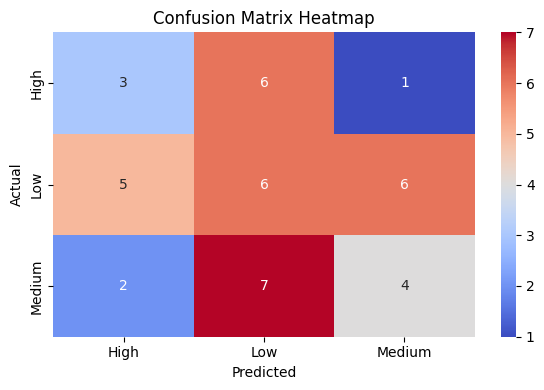


🌾 Enter Soil, Rainfall, and Seed Type to Predict Yield:
Soil pH (e.g., 6.5): 7.4
Nitrogen content (e.g., 60): 72
Rainfall (mm) (e.g., 700): 834
Seed Type (Hybrid/Traditional): Hybrid

✅ Predicted Crop Yield Category: Medium


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score
)

# === 1. Create Sample Dataset (or load from CSV) ===
data = {
    'Soil_pH': np.random.uniform(5.5, 8.5, 200),
    'Nitrogen': np.random.randint(10, 100, 200),
    'Rainfall': np.random.uniform(200, 1200, 200),
    'Seed_Type': np.random.choice(['Hybrid', 'Traditional'], 200),
    'Yield_Category': np.random.choice(['Low', 'Medium', 'High'], 200)
}
df = pd.DataFrame(data)

# === 2. Encode Categorical Variables ===
le_seed = LabelEncoder()
df['Seed_Type'] = le_seed.fit_transform(df['Seed_Type'])  # Hybrid=0, Traditional=1

le_yield = LabelEncoder()
df['Yield_Category'] = le_yield.fit_transform(df['Yield_Category'])  # Low=0, Medium=1, High=2

# === 3. Classification Problem ===
print("\n🧪 Performing Classification: Crop Yield Prediction")
X = df.drop('Yield_Category', axis=1)
y = df['Yield_Category']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# === 4. Evaluation Metrics ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("\n📊 Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_yield.classes_))

# === 5. Confusion Matrix Heatmap ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=le_yield.classes_,
            yticklabels=le_yield.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# === 6. User Input Prediction ===
print("\n🌾 Enter Soil, Rainfall, and Seed Type to Predict Yield:")

try:
    soil_ph = float(input("Soil pH (e.g., 6.5): "))
    nitrogen = int(input("Nitrogen content (e.g., 60): "))
    rainfall = float(input("Rainfall (mm) (e.g., 700): "))
    seed_type_str = input("Seed Type (Hybrid/Traditional): ").capitalize()

    if seed_type_str not in le_seed.classes_:
        raise ValueError("Invalid Seed Type")

    seed_type = le_seed.transform([seed_type_str])[0]

    user_data = np.array([[soil_ph, nitrogen, rainfall, seed_type]])
    user_prediction = model.predict(user_data)
    yield_label = le_yield.inverse_transform(user_prediction)[0]

    print(f"\n✅ Predicted Crop Yield Category: {yield_label}")
except Exception as e:
    print(f"\n⚠️ Error: {e}")
